<center>
<hr>
<h2> Handwritten Digits Image Classification </h2>
<h2> KNN, Linear SVM, Gaussian Kernal SVM, Naive Bayes, Decision Tree, Random Forest and Voting algorithm </h2>

</center>

In [145]:
# Importing the dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

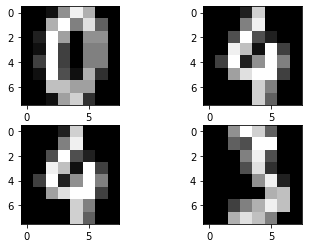

In [146]:
import matplotlib.pyplot as plt
digits.images[0].shape
list = [10,100,100,45]
fig = plt.figure()
for i,j in enumerate(list):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[j],cmap='gray')

In [147]:
X =  digits.data
y =  digits.target

## Step 1. Split the dataset into training data and testing data

In [148]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [149]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1437, 64)
X_test dimension=  (360, 64)
y_train dimension=  (1437,)
y_train dimension=  (360,)


## Step 2. Algorithm Analysis

In [150]:
log_reg = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [151]:
from sklearn.metrics import accuracy_score, mean_squared_error

y_pred_log = log_reg.predict(X_test)
print('Accuracy of Logistic Regression Model is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))
mse_Log = metrics.mean_squared_error(y_test,y_pred_log)
print('Mean Squared Error for Linear SVM model: {0:0.4f}'. format(mse_Log))


Accuracy of Logistic Regression Model is: 0.9694
Mean Squared Error for Linear SVM model: 0.4500


## Method 1. KNN

In [152]:
#Predicting the test set result  
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for Linear SVM Classifier:")
print(cm_knn)
clss_report_knn= classification_report(y_test, y_pred_knn)
print("\nClassification Report for Linear SVM Classifier:",)
print (clss_report_knn)
acc_score_Knn = accuracy_score(y_test,y_pred_knn)

print('Accuracy for Linear SVM Classifier: {0:0.4f}'. format(acc_score_Knn))
mse_knn = metrics.mean_squared_error(y_test,y_pred_knn)
print('Mean Squared Error for Linear SVM Classifier: {0:0.4f}'. format(mse_knn))

Confusion Matrix for Linear SVM Classifier:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 34]]

Classification Report for Linear SVM Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      1.00      1.00        29
           9       0.97      1.00 

## Method 2. Linear SVM

In [153]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
classifier_LSVM = SVC(kernel='linear')
classifier_LSVM.fit(X_train, y_train)
y_predicted_LSVM = classifier_LSVM.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_LSVM = confusion_matrix(y_test, y_predicted_LSVM)
print("Confusion Matrix for Linear SVM Classifier:")
print(cm_LSVM)
clss_report_LSVM = classification_report(y_test, y_predicted_LSVM)
print("\nClassification Report for Linear SVM Classifier:",)
print (clss_report_LSVM)
acc_score_LSVM = accuracy_score(y_test,y_predicted_LSVM)

print('Accuracy for Linear SVM Classifier: {0:0.4f}'. format(acc_score_LSVM))
mse_LSVM = metrics.mean_squared_error(y_test,y_predicted_LSVM)
print('Mean Squared Error for Linear SVM Classifier: {0:0.4f}'. format(mse_LSVM))


Confusion Matrix for Linear SVM Classifier:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]

Classification Report for Linear SVM Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.97      0.97 

## Method 3. Gaussian Kernal SVM

In [154]:

from sklearn.svm import SVC
classifier_GSVM = SVC(kernel ='rbf')
classifier_GSVM.fit(X_train, y_train)
y_predicted_GSVM = classifier_LSVM.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_GSVM = confusion_matrix(y_test, y_predicted_GSVM)
print("Confusion Matrix for Gaussian SVM Classifier:")
print(cm_GSVM)
clss_report_GSVM = classification_report(y_test, y_predicted_GSVM)
print("\nClassification Report for Gaussian SVM Classifier:",)
print (clss_report_GSVM)
acc_score_GSVM = accuracy_score(y_test,y_predicted_GSVM)

print('Accuracy for Gaussian SVM Classifier: {0:0.4f}'. format(acc_score_GSVM))
mse_GSVM = metrics.mean_squared_error(y_test,y_predicted_GSVM)
print('Mean Squared Error for Gaussian SVM Classifier: {0:0.4f}'. format(mse_GSVM))




Confusion Matrix for Gaussian SVM Classifier:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]

Classification Report for Gaussian SVM Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.97      0

## Method 4. Naive Bayes

In [155]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

# fit the model
naive_bayes_classifier.fit(X_train, y_train)

y_pred_GNB = naive_bayes_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_NB = confusion_matrix(y_test, y_pred_GNB)
print("Confusion Matrix for Gaussian Naive Bayes Classifier:")
print(cm_NB)
clss_report_NB = classification_report(y_test, y_pred_GNB)
print("\nClassification Report for Gaussian Naive Bayes Classifier:",)
print (clss_report_NB)
acc_score_NB = accuracy_score(y_test,y_pred_GNB)

print('Accuracy for Gaussian Naive Bayes Classifier: {0:0.4f}'. format(acc_score_NB))
mse_NB = metrics.mean_squared_error(y_test,y_pred_GNB)
print('Mean Squared Error for Gaussian Naive Bayes Classifier: {0:0.4f}'. format(mse_NB))

Confusion Matrix for Gaussian Naive Bayes Classifier:
[[41  0  0  0  1  0  0  1  0  0]
 [ 0 29  0  0  0  0  0  0  6  0]
 [ 0  3 23  1  0  0  0  0  9  0]
 [ 0  1  1 32  0  2  0  2  3  0]
 [ 1  0  0  0 35  0  1  0  1  0]
 [ 0  1  0  0  0 25  0  2  2  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  1  0  0  0  0 28  0]
 [ 0  1  0  1  2  1  0  5  4 20]]

Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.83      0.83      0.83        35
           2       0.96      0.64      0.77        36
           3       0.91      0.78      0.84        41
           4       0.92      0.92      0.92        38
           5       0.89      0.83      0.86        30
           6       0.97      1.00      0.99        37
           7       0.79      1.00      0.88        37
           8       0.53      0.97      0.68        29
           9  

In [156]:


print('Naive Bays Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_GNB)))
mse_NB = metrics.mean_squared_error(y_test,y_pred_GNB)
print('Mean Squared Error for Linear SVM model: {0:0.4f}'. format(mse_NB))

Naive Bays Model accuracy score: 0.8528
Mean Squared Error for Linear SVM model: 3.0556


## Method 5. Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=10)   
Tree_model.fit(X_train,y_train)

#DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

y_predict_tree = Tree_model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_test, y_predict_tree)
print("Confusion Matrix for Decision Tree Clasifier:")
print(cm_tree)
clss_report_Tree = classification_report(y_test, y_predict_tree)
print("Classification Report for Decision Tree Classifier:",)
print (clss_report_Tree)
acc_score_tree = accuracy_score(y_test,y_predict_tree)

print('Accuracy of Decision Tree classifier: {0:0.4f}'. format(acc_score_tree))
mse_tree = metrics.mean_squared_error(y_test,y_predict_tree)
print('Mean Squared Error for Decision Tree classifier: {0:0.4f}'. format(mse_tree))

Confusion Matrix for Decision Tree Clasifier:
[[40  0  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  3  9  0  0 23  0]
 [ 0  0  0  0  0  8  1  0 27  0]
 [ 0  0  0  0  1  4  0  0 35  1]
 [ 3  0  0  0 23  1  7  0  4  0]
 [ 0  0  0  0  0 28  0  0  2  0]
 [ 0  0  0  0  0  2 35  0  0  0]
 [ 0  0  0  0  5  1  0  0 31  0]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  2  0  0 21 11]]
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        41
           4       0.70      0.61      0.65        38
           5       0.49      0.93      0.64        30
           6       0.81      0.95      0.88        37
           7       0.00      0.00      0.00        37
           8       0.16      0.97      0.28        29
           9       0.92      0

C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Method 6. Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 50)
RF_classifier.fit(X_train, y_train)

y_pred_RF = RF_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix for Random Forest Classifier:")
print(cm_RF)
clss_report_RF = classification_report(y_test, y_pred_RF)
print("Classification Report for Random Forest Classifier:",)
print (clss_report_RF)
acc_score_RF = accuracy_score(y_test,y_pred_RF)

print('Accuracy of Random forest classifier: {0:0.4f}'. format(acc_score_RF))
mse_RF = metrics.mean_squared_error(y_test,y_pred_RF)
print('Mean Squared Error for Random Forest Classifier: {0:0.4f}'. format(mse_RF))

Confusion Matrix for Random Forest Classifier:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  0 33]]
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.95      0.97        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.96      0.93      0.95        29
           9       0.89      

## Method 7. Voting Classifier

In [159]:
from sklearn.ensemble import VotingClassifier


voting_clss = VotingClassifier(estimators=[('lg', log_reg), ('knn', knn), ('LSVM', classifier_LSVM),
                            ('GSVM', classifier_GSVM), ("NB",naive_bayes_classifier), ("tree",Tree_model), ("RF",RF_classifier)], voting='hard')

voting_clss.fit(X_train,y_train)


y_pred_Voting = voting_clss.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm_voting = confusion_matrix(y_test, y_pred_Voting)
print("Confusion Matrix:")
print(cm_voting)
clss_report_voting = classification_report(y_test, y_pred_Voting)
print("Classification Report:")
print (clss_report_voting)
acc_score_voting = accuracy_score(y_test,y_pred_Voting)

print('Accuracy of Voting classifier: {0:0.4f}'. format(acc_score_voting))
mse_voting = metrics.mean_squared_error(y_test,y_pred_Voting)
print('Mean Squared Error for Voting Classifier model: {0:0.4f}'. format(mse_voting))

Confusion Matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  0 33]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.97      0.97      0.97        34

    accuracy                    

## Step 3: Accuracy Results Table

<table>
    <thead>
        <tr>
            <th></th>
            <th>KNN</th>
            <th>L_SVM</th>
            <th>RBF_SVM</th>
            <th>NB</th>
            <th>DT</th>
            <th>RF</th>
            <th>Voting</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Accuracy</td>
            <td>0.9944</td>
            <td>0.9917</td>
            <td>0.9917</td>
            <td>0.8528</td>
            <td>0.4583</td>
            <td>0.9833</td>
            <td>0.9944</td>
        </tr>
        <tr>
            <td>Weighted Precision</td>
            <td>0.99</td>
            <td>0.99</td>
            <td>0.99</td>
            <td>0.89</td>
            <td>0.41</td>
            <td>0.98</td>
            <td>0.99</td>
        </tr>
        <tr>
            <td>Weighted Recall</td>
            <td>0.99</td>
            <td>0.99</td>
            <td>0.99</td>
            <td>0.85</td>
            <td>0.46</td>
            <td>0.98</td>
            <td>0.99</td>
        </tr>
    </tbody>
</table>